## Churn Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
# Load your data (adjust path/filename as needed)
df = pd.read_csv('Customer Churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [4]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [5]:
stat = df.describe().round(0)
stat

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.0,3150.0,3150.0,3150.0,3150.0,3150.0,3150.0,3150.0,3150.0,3150.0,3150.0,3150.0,3150.0,3150.0
mean,8.0,0.0,33.0,1.0,4472.0,69.0,73.0,24.0,3.0,1.0,1.0,31.0,471.0,0.0
std,7.0,0.0,9.0,2.0,4198.0,57.0,112.0,17.0,1.0,0.0,0.0,9.0,517.0,0.0
min,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,15.0,0.0,0.0
25%,1.0,0.0,30.0,0.0,1391.0,27.0,6.0,10.0,2.0,1.0,1.0,25.0,114.0,0.0
50%,6.0,0.0,35.0,0.0,2990.0,54.0,21.0,21.0,3.0,1.0,1.0,30.0,228.0,0.0
75%,12.0,0.0,38.0,1.0,6478.0,95.0,87.0,34.0,3.0,1.0,1.0,30.0,788.0,0.0
max,36.0,1.0,47.0,10.0,17090.0,255.0,522.0,97.0,5.0,2.0,2.0,55.0,2165.0,1.0


In [6]:
# 1. Calculate overall churn rate
churn_rate = df['Churn'].mean()
print(f"Overall churn rate: {churn_rate:.2%}")

Overall churn rate: 15.71%


## Summary of Churn Status?

Customers who stay tend to be more active — they use the service longer and more often.

Churned customers use the service less and spend less, which might be a warning sign of dissatisfaction or reduced engagement before leaving.

Charge amount being low for churners could mean they didn’t invest much in the service or were on cheaper plans.

This type of insight helps businesses identify what behaviors or patterns are linked with churn, so they can target at-risk customers earlier.

In [7]:
# 2. Summary statistics grouped by churn status
summary_by_churn = df.groupby('Churn').agg({
    'Call  Failure': ['mean', 'median'],
    'Charge  Amount': ['mean', 'median'],
    'Seconds of Use': ['mean', 'median'],
    'Frequency of use': ['mean', 'median']
})

# Round to 2 decimal places
summary_by_churn = summary_by_churn.round(2)

print("\nSummary statistics by churn status:")
summary_by_churn


Summary statistics by churn status:


Call  Failure        Charge  Amount        Seconds of Use          \
               mean median           mean median           mean  median   
Churn                                                                     
0              7.66    6.0           1.08    0.0        5014.22  3530.0   
1              7.48    5.0           0.23    0.0        1566.63  1182.0   

      Frequency of use         
                  mean median  
Churn                          
0                76.98   63.0  
1                29.13   25.0

## Correlation

In [8]:
numeric_cols = df.select_dtypes(include='number').columns.drop('Churn')
correlations = df[numeric_cols].corrwith(df['Churn'])

# Sort by absolute correlation value, descending
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("\nCorrelation with churn (sorted by strength):")
print(correlations.loc[correlations_sorted.index])


Correlation with churn (sorted by strength):
Complains                  0.532053
Status                     0.498976
Frequency of use          -0.303337
Seconds of Use            -0.298935
Customer Value            -0.289144
Distinct Called Numbers   -0.278867
Frequency of SMS          -0.220754
Charge  Amount            -0.202305
Tariff Plan               -0.105853
Subscription  Length      -0.032588
Age                       -0.017705
Age Group                 -0.014550
Call  Failure             -0.008987
dtype: float64


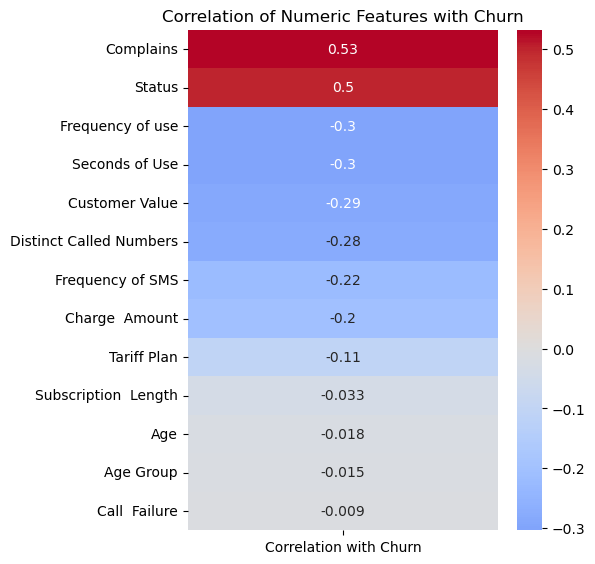

In [9]:
# Select numeric columns excluding 'Churn'
numeric_cols = df.select_dtypes(include='number').columns.drop('Churn')

# Calculate correlations with 'Churn'
correlations = df[numeric_cols].corrwith(df['Churn'])

# Sort by absolute correlation value descending
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Reorder correlations based on sorted index
correlations_ordered = correlations.loc[correlations_sorted.index]

# Create a DataFrame for the heatmap (1 column, correlations with 'Churn')
corr_df = correlations_ordered.to_frame(name='Correlation with Churn')

# Plot heatmap
plt.figure(figsize=(5, len(corr_df) * 0.5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Numeric Features with Churn')
plt.show()


## Breakdown of churn customers in different age group:

For each group, it shows the percentage of customers who did not churn (0) and who did churn (1).

For example, in Age Group 0-20, 100% of customers stayed (churn = 0) and 0% left (churn = 1).

In Age Group 41-50, 80% stayed, and 20% left.

This helps us see if churn is different depending on the customer’s age category.

In [10]:
# Define age bins and labels
bins = [0, 20, 30, 40, 50, 100]  # Adjust according to your data range
labels = ['0-20', '21-30', '31-40', '41-50', '51+']

# Create a new column 'Age Range' based on these bins
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

age_churn_ct = pd.crosstab(df['Age Range'], df['Churn'], normalize='index') * 100

print("\nChurn rate by Age Range (%):")
age_churn_ct


Churn rate by Age Range (%):


Churn,0,1
Age Range,,
0-20,100.000000,0.000000
21-30,83.184403,16.815597
41-50,80.000000,20.000000
51+,98.823529,1.176471


## The actual monetary value isn’t given.

Instead, it’s ranked or categorized from 0 to 9, where:

0 = lowest spending customers

9 = highest spending customers

So it's not a currency value, but more like a bucket or score.

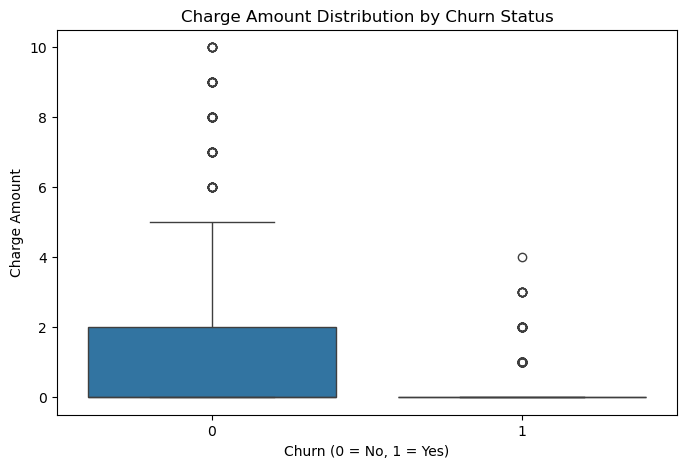

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charge  Amount', data=df)
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Charge Amount')
plt.title('Charge Amount Distribution by Churn Status')
plt.show()

## Variable information

+ Anonymous Customer ID
+ Call Failures: number of call failures
+ Complains: binary (0: No complaint, 1: complaint)
+ Subscription Length: total months of subscription
+ Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)
+ Seconds of Use: total seconds of calls
+ Frequency of use: total number of calls
+ Frequency of SMS: total number of text messages
+ Distinct Called Numbers: total number of distinct phone calls 
+ Age Group: ordinal attribute (1: younger age, 5: older age)
+ Tariff Plan: binary (1: Pay as you go, 2: contractual)
+ Status: binary (1: active, 2: non-active)
+ Churn: binary (1: churn, 0: non-churn) - Class label
+ Customer Value: The calculated value of customer

### Definitions
**Call Failure:** The number of times a customer’s call didn’t connect properly.

**Complains**: How many complaints the customer has made.

**Subscription Length**: How long the customer has been subscribed (usually in months).

**Charge Amount**: The total money the customer has been charged during the subscription period.

**Seconds of Use**: Total seconds the customer spent on calls.

**Frequency of Use**: How often the customer makes calls (number of calls).

**Frequency of SMS**: How often the customer sends text messages (number of SMS).

**Distinct Called Numbers**: How many different phone numbers the customer has called.

**Age Group**: The customer’s age category (e.g., 1 might be 18-25, 2 might be 26-35, etc.).

**Tariff Plan**: The type of plan or pricing package the customer is on.

**Status**: This could indicate if the customer is active, inactive, or other status types depending on the dataset.

**Age**: The customer’s exact age.

**Customer Value**: A measure of how valuable the customer is to the business (could be based on spending, usage, etc.).

**Churn**: Whether the customer has stopped using the service (1 means they left, 0 means they stayed).

